In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/meteorite-cleaned.csv')
df.sample(5)

name     id nametype recclass    mass   fall    year  \
29412       Yamato 791859  27208    Valid       H5   57.20  Found  1979.0   
2773   Allan Hills A78108   1723    Valid       H5  172.50  Found  1978.0   
4807         Asuka 882040   4749    Valid       L6  212.85  Found  1988.0   
1922    Allan Hills 84195    797    Valid       L4    2.10  Found  1984.0   
1888    Allan Hills 84161    763    Valid       H5   82.90  Found  1984.0   

         reclat    reclong               GeoLocation  
29412 -71.50000   35.66667   (-71.500000, 35.666670)  
2773  -76.71667  159.66667  (-76.716670, 159.666670)  
4807  -72.00000   26.00000   (-72.000000, 26.000000)  
1922  -76.69848  159.39858  (-76.698480, 159.398580)  
1888  -76.71086  158.72872  (-76.710860, 158.728720)

Meteors over the years

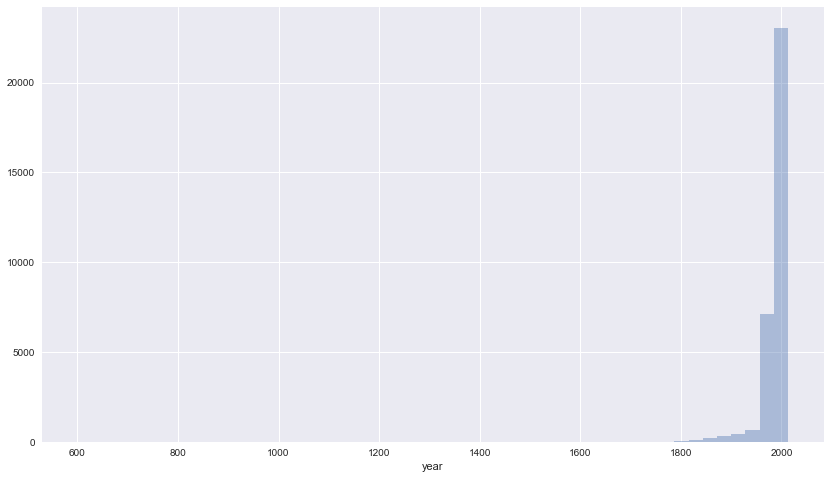

In [3]:
plt.figure(figsize=(14,8))
sns.distplot(df['year'], kde=False)

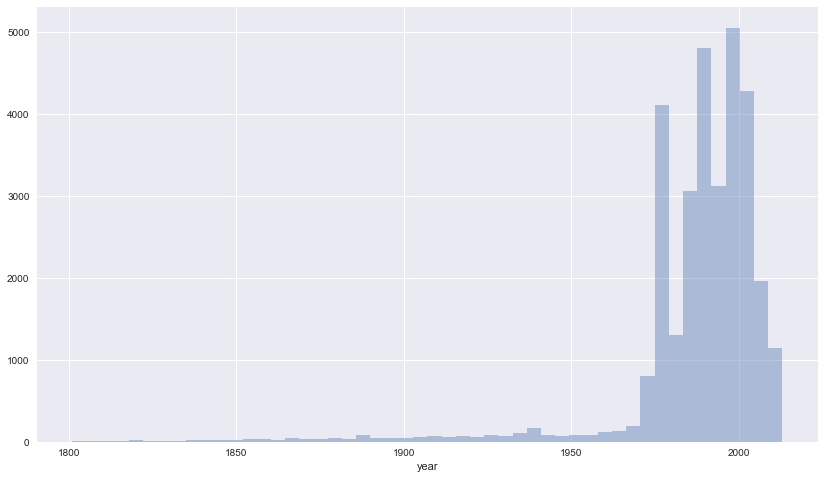

In [4]:
plt.figure(figsize=(14,8))
sns.distplot(df[df['year']>1800]['year'], kde=False)

In [5]:
import plotly


In [6]:
from plotly.graph_objs import Scatter, Layout

In [7]:
plotly.offline.init_notebook_mode(connected=True)

In [8]:
import plotly.graph_objs as go

In [9]:
df2 = df[:100]

In [10]:
trace3 = dict(
    type = 'scattergeo',
    lon = df2['reclong'],
    lat = df2['reclat'],
    marker = dict(
        #color = ['red', 'blue'],
        size = np.log10(df2['mass'])
    ),
    mode = 'markers'
    
)

plotly.offline.iplot([trace3])

In [11]:
trace4 = dict(
    type = 'scattergeo',
    locationmode = 'country names',
    lon = df2['reclong'],
    lat = df2['reclat'],
    text = df2['name'],
    marker = dict(
        #color = ['red', 'blue'],
        size = np.log10(df2['mass'])
    ),
    mode = 'markers'
    
)

layout4 = dict(
    title = "Meteorite Landings",
    geo = dict(
        scope = 'world',
        projection = dict(type = 'equidistant'),
        showland = True,
        landcolor = "rgb(250, 250, 250)",
        showcountries = True,
        countrywidth = 0.2,
        coastlinewidth = 0.5,
        showframe = False
    )
)

pfig4 = dict(data = [trace4], layout = layout4)

plotly.offline.iplot(pfig4)

In [12]:
df[df['mass'] >= 100000]['mass'].shape[0]

282

In [13]:
# plot meteorites with mass >= 100 kg (100000 grams)
df100kg = df[df['mass'] >= 100000]

In [14]:
df100kg['mass'].max()

60000000.0

In [15]:

trace5 = dict(
    type = 'scattergeo',
    locationmode = 'country names',
    lon = df100kg['reclong'],
    lat = df100kg['reclat'],
    text = df100kg['name'],
    marker = dict(
        color = df100kg['mass']/1000,
        size = np.log10(df100kg['mass']),
        #size = df100kg['mass']/1000000,
        line = dict(width=1, color='rgb(40,40,40)'),
        colorscale = 'Reds',
        colorbar = dict(title = "Meteorite mass in kg")
    ),
    mode = 'markers'
    
)

layout5 = dict(
    title = "Meteorite Landings: mass >= 100kg",
    geo = dict(
        scope = 'world',
        projection = dict(type = 'equidistant'),
        showland = True,
        landcolor = "rgb(250, 250, 250)",
        showcountries = True,
        countrywidth = 0.2,
        coastlinewidth = 0.5,
        showframe = False
    )
)

pfig5 = dict(data = [trace5], layout = layout5)

plotly.offline.iplot(pfig5)

In [16]:
df[df['mass'] >= 1000000]['mass'].shape[0]

53

In [17]:
# plot meteorites with mass >= 1000 kg (100000 grams)
df1000kg = df[df['mass'] >= 1000000]

In [18]:
trace6 = dict(
    type = 'scattergeo',
    locationmode = 'country names',
    lon = df1000kg['reclong'],
    lat = df1000kg['reclat'],
    text = df1000kg['name'],
    marker = dict(
        color = df1000kg['mass']/1000,
        size = np.log(df1000kg['mass']),
        #size = df100kg['mass']/100000,
        line = dict(width=1, color='rgb(40,40,40)'),
        colorscale = 'Reds',
        colorbar = dict(title = "Meteorite mass in kg")
    ),
    mode = 'markers'
    
)

layout6 = dict(
    title = "Meteorite Landings: mass >= 100kg",
    geo = dict(
        scope = 'world',
        projection = dict(type = 'equidistant'),
        showland = True,
        landcolor = "rgb(250, 250, 250)",
        showcountries = True,
        countrywidth = 0.2,
        coastlinewidth = 0.5,
        showframe = False
    )
)

pfig6 = dict(data = [trace6], layout = layout6)

plotly.offline.iplot(pfig6)

In [20]:
df['fall'].unique()

array(['Fell', 'Found'], dtype=object)

In [21]:
df_fell = df[df['fall'] == 'Fell']
df_found = df[df['fall'] == 'Found']

In [24]:
df_fell.shape[0]

1064

In [25]:
df_found.shape[0]

30866

In [37]:
# fell: observed
# found: not observed, just found

trace_fell = dict(
    type = 'scattergeo',
    locationmode = 'country names',
    lon = df_fell['reclong'],
    lat = df_fell['reclat'],
    text = df_fell['name'],
    marker = dict(
        color = '#1736E1',
        size = np.log(df_fell['mass'])/3,
        #size = df100kg['mass']/100000,
        #line = dict(width=1, color='rgb(40,40,40)'),
        #colorscale = 'Reds',
        #colorbar = dict(title = "Meteorite mass in kg")
    ),
    mode = 'markers',
    name = '<span style="color:#1736E1">Observed</span>'
)

trace_found = dict(
    type = 'scattergeo',
    locationmode = 'country names',
    lon = df_found['reclong'],
    lat = df_found['reclat'],
    text = df_found['name'],
    marker = dict(
        color = '#F6578E',
        size = np.log(df_found['mass'])/3,
        #size = df100kg['mass']/100000,
        #line = dict(width=1, color='rgb(40,40,40)'),
        #colorscale = 'Reds',
        #colorbar = dict(title = "Meteorite mass in kg")
    ),
    mode = 'markers',
    name = '<span style="color:#F6578E">Found</span>'
    
)

layout_fall = dict(
    title = "Meteorite Landings: Observed vs Found",
    geo = dict(
        scope = 'world',
        projection = dict(type = 'equidistant'),
        showland = True,
        landcolor = "rgb(250, 250, 250)",
        showcountries = True,
        countrywidth = 0.2,
        coastlinewidth = 0.5,
        showframe = False
    )
)

pfig_fall = dict(data = [trace_fell, trace_found], layout = layout_fall)

plotly.offline.iplot(pfig_fall)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:30: RuntimeWarning:

divide by zero encountered in log

